In [41]:
import numpy as np
import os
from os import listdir
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [42]:
#Load the 2nd dataset
import pandas as pd

#The data set : https://www.kaggle.com/datasets/debanga/facial-expression-recognition-challenge?resource=download
#Rename the folder as faceEmotion_dataset_v2

# read the CSV file
df = pd.read_csv("faceEmotion_dataset_v2/icml_face_data.csv/icml_face_data.csv")

num_classes = 7

# print the first few rows of the DataFrame
print(df.head())

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [31]:
def remove_emotion(df, numberEmotion):
    '''Remove the "numberEmotion" from the dataset df'''
    maskEmotion = df["emotion"] != numberEmotion

    return df.loc[maskEmotion]

# If we want to remove an emotion from the data, we can use this code
# df = remove_emotion(df, 2)
# df = remove_emotion(df, 3)
# df = remove_emotion(df, 6)
df = df.reset_index()
df

In [43]:
#Split between training and test
maskTraining = df[" Usage"] == "Training"
maskTest = [not elem for elem in maskTraining]

df_train = df.loc[maskTraining]
df_test = df.loc[maskTest]

In [45]:
def list_string_to_arrayImages(L, sizeX=48, sizeY=48):

    Images_Dataset = []
    for k in range(L.index[0], L.index[-1] + 1):
        # split the string into a list of strings
        # lst = df[" pixels"][k].split()
        lst = L[k].split()

        # convert the strings to integers using map() and a lambda function
        lst = list(map(lambda x: int(x), lst))

        Images_Dataset.append(lst)
    Images_Dataset = np.array(Images_Dataset)
    Images_Dataset = Images_Dataset.reshape(Images_Dataset.shape[0], sizeX , sizeY)
    Images_Dataset = Images_Dataset.astype('float32')
    Images_Dataset /= 255
    return Images_Dataset

In [46]:
#Proprocess dataset and get X_train and X_test
X_train = list_string_to_arrayImages(df_train[" pixels"])
X_test = list_string_to_arrayImages(df_test[" pixels"])

print((X_train).shape)
print((X_test).shape)


(28709, 48, 48)
(7178, 48, 48)


In [58]:
#get y_train and y_test
Labels_train = list(df_train["emotion"])
Labels_test = list(df_test["emotion"])

In [59]:
#change the shape of the object labels
y_train = to_categorical(Labels_train, num_classes) 
y_test = to_categorical(Labels_test, num_classes) 

# define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
898/898 [==============================] - 73s 80ms/step - loss: 1.6145 - accuracy: 0.3734
Epoch 2/10
898/898 [==============================] - 75s 84ms/step - loss: 1.4536 - accuracy: 0.4480
Epoch 3/10
898/898 [==============================] - 71s 80ms/step - loss: 1.3705 - accuracy: 0.4857
Epoch 4/10
898/898 [==============================] - 78s 87ms/step - loss: 1.3110 - accuracy: 0.5104
Epoch 5/10
898/898 [==============================] - 72s 80ms/step - loss: 1.2673 - accuracy: 0.5278
Epoch 6/10
898/898 [==============================] - 66s 73ms/step - loss: 1.2262 - accuracy: 0.5469
Epoch 7/10
898/898 [==============================] - 67s 75ms/step - loss: 1.1886 - accuracy: 0.5620
Epoch 8/10
898/898 [==============================] - 67s 75ms/step - loss: 1.1522 - accuracy: 0.5758
Epoch 9/10
898/898 [==============================] - 66s 73ms/step - loss: 1.1173 - accuracy: 0.5917
Epoch 10/10
898/898 [==============================] - 82s 91ms/step - loss: 1.080

In [81]:
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))


print('Accuracy:', accuracy)

225/225 [==============================] - 3s 15ms/step
Accuracy: 0.47826692672053495


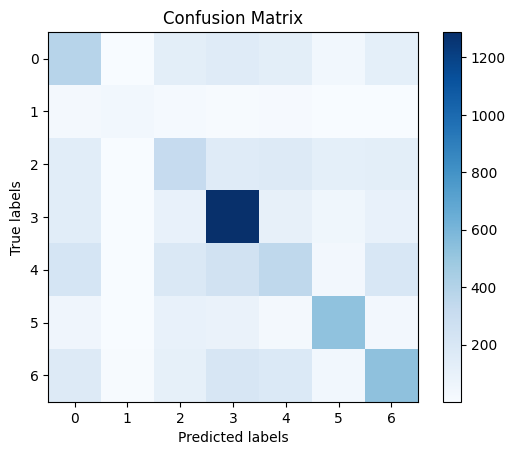

In [84]:
from sklearn.metrics import confusion_matrix

predictions_class = np.argmax(predictions, axis=1)
# y_true and y_pred are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions_class)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
for i in range(num_classes):
    accuracy = cm[i, i] / cm[i].sum()
    accuracies.append(accuracy)
print("Accuracy by class:", accuracies)

# calculate the precision, recall, and F1 score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy by class: [0.3987473903966597, 0.34234234234234234, 0.310546875, 0.7260428410372041, 0.2814755412991179, 0.6329723225030084, 0.42984590429845904]
Precision: [0.34046346 0.6031746  0.33615222 0.6004662  0.36       0.64460784
 0.4770477 ]
Recall: [0.39874739 0.34234234 0.31054688 0.72604284 0.28147554 0.63297232
 0.4298459 ]
F1 score: [0.36730769 0.43678161 0.32284264 0.65731054 0.31593159 0.6387371
 0.45221843]
